## Introduction to Audio Processing, TP1: characteristics of music and speech signals
#### H. Boutin, 2025-11-24

In [258]:
# DO NOT MODIFY THIS CELL !!
%matplotlib ipympl

import numpy as np
from IPython.display import display, Audio
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
from filtres import filtre
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [259]:
# DO NOT MODIFY THIS CELL !!
#import sys
#print(sys.executable)

## Part 1 : ANALYSIS OF SINGING VOICE AND MUSIC FILES

### 1.1 WAVEFORMS (TIME DOMAIN)

#### a. Load one of the two voice files, as desired

In [260]:
# UNCOMMENT ONE OF THE 2 FOLLOWING LINES
# x_voice0, Fs = sf.read('son/Voice_LaurynHill.wav')
x_voice0, Fs = sf.read('son/Voice_AmyWinehouse.wav')


#### b. Data display: construct the time vector and visualize the stereo signal using the syntax: plt.plot(t_vect, signal) 

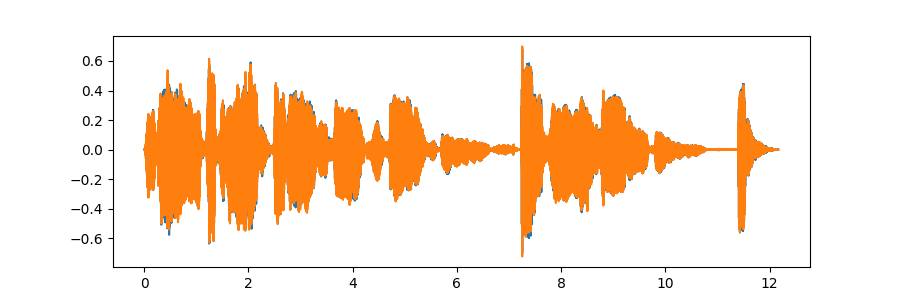

In [261]:
t_nb_point = len(x_voice0)
t_vect = np.linspace(0, t_nb_point/Fs, t_nb_point)
plt.figure(figsize= (9, 3))
plt.plot(t_vect, x_voice0)
plt.show()

#### Compare the two channels and comment




####

#### c. Separate the two channels and visualize the right channel

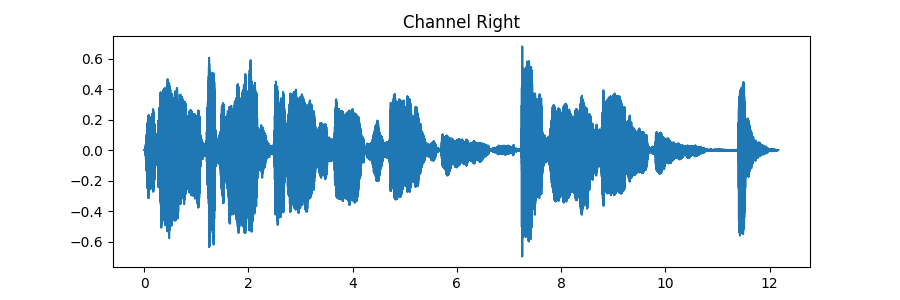

In [262]:
x_voice0R = x_voice0[:, 0]
x_voice0L = x_voice0[:, 1]
def plot_right(x_voice0R):
    t_nb_point = len(x_voice0R)
    t_vect = np.linspace(0, t_nb_point/Fs, t_nb_point)
    plt.figure(figsize= (9, 3))
    plt.plot(t_vect, x_voice0R)
    plt.title("Channel Right")
    plt.show()
plot_right(x_voice0R)

#### d. Listen to the right channel with different sample rates

In [263]:
sd.play(x_voice0R, samplerate=int(Fs))

#### What are the sound effects due to a modification of sample rate(pitch, duration) ?

By increasing the Fs we get a higher pitch and a lower duration.
By lowering Fs we get the opposite.

### 1.2 SPECTRUM (FREQUENCY DOMAIN)

#### a. Data display: construct the frequency vector, calculate the Discrete Fourier Transform (np.fft.fft) and visualize its modulus (np.abs) 

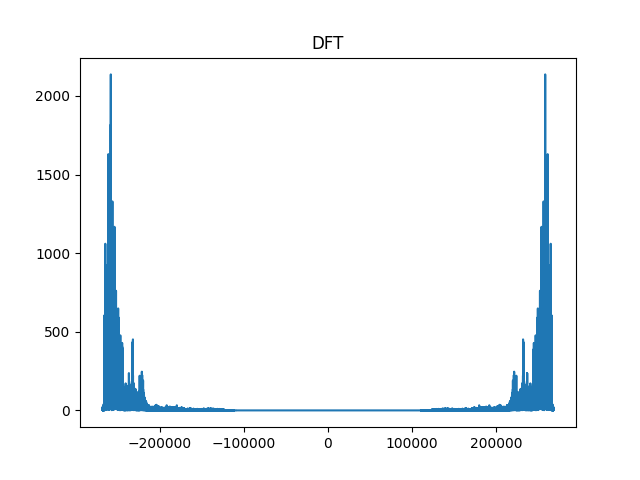

In [264]:
dft = np.fft.fft(x_voice0R)
f_nb_point = len(dft)
f_vector = np.linspace(-f_nb_point//2, f_nb_point//2, f_nb_point)

plt.figure()
plt.plot(f_vector, np.abs(dft))
plt.title("DFT")
plt.show()

#### b. What is the Voice signal bandwidth ?

#### c. Restart the study on the guitar signal: load and listen to the file, separate the two channels, visualize the waveform, then visualize the modulus of its Discrete Fourier Transform.

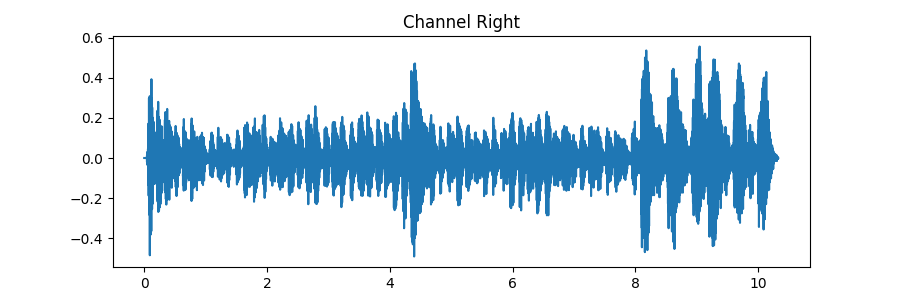

In [265]:
# UNCOMMENT AND COMPLETE ONE OF THE 2 FOLLOWING LINES
#x_guit0, Fs = sf.read('son/GuitarBlues.wav')
x_guit0, Fs = sf.read('son/GuitarMetal.wav')

# ISOLATE CHANNEL RIGHT
x_guit0R = x_guit0[:, 0]

# VISUALIZE THE WAVEFORM
plot_right(x_guit0R)

# VISUALIZE THE SPECTRUM

#### d. What is the guitar signal bandwidth? Compare to the voice signal bandwidth. Comment.

## Partie 2 : AUDIO EFFECTS SETTINGS

### 2.1 Parameterization of a reverb effect on the singing voice waveform 

#### A reverb effect can be obtained using the following recurrence equation : y[n] = x[n]+K x[n-N]. Adjust parameters K and N in order to apply a reverb effect to the singing voice waveform previously studied. To do that, a 'for' loop will be used on the time index 'n'.

In [266]:
# INITIALIZE
x_voiceRevR = np.zeros(np.shape(x_voice0R))
N = 10000
K = 0.3

for n in range(1, len(x_voice0R)):
    x_voiceRevR[n] = x_voice0R[n] + K * x_voice0R[n - N]

sd.play(x_voiceRevR, samplerate=Fs)

#### Listen to the reverberated sound for different values of N and K parameters. Which characteristics of the audio file are affected by parameters N and K?

### 2.2 Parameterization of a distorsion effect on the guitar waveform

#### A distorsion effect can be obtained using the following algorithm : y[n] = min(x[n],Gain) IF x[n]>0 and y[n] = max(x[n],-Gain) IF x[n]<0. After visualizing the guitar waveform, adjust the "Gain" value in order to apply a distorsion effect to the guitar waveform previously studied. To do that : 
#### - A "for" loop will be used on the time index 'n';
#### - The distorted signal will be normalized, so that its amplitude is equal to that of the initial 'clean' guitar signal;
#### - The initial 'clean' guitar waveform and the normalized distorted waveform will be visualized on the same figure, in order to be compared.
#### - We will listen to the normalized distorted waveform, and comment the applied audio affect.


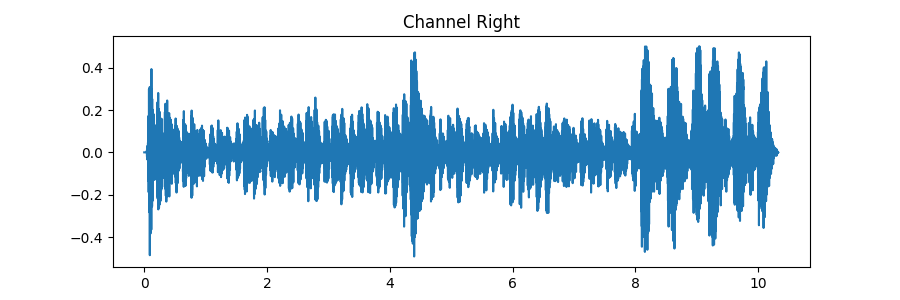

In [267]:
# INITIALIZE
x_guitSatuR=np.zeros(np.shape(x_guit0R)) # initialisation du signal réverbéré 

# AUDIO EFFECT
Gain = 0.5

for n in range(1, len(x_guit0R)):
    x_guitSatuR[n]=x_guit0R[n]
    if x_guit0R[n]>Gain:
        x_guitSatuR[n] = min(x_guit0R[n],Gain)
    if x_guit0R[n]<-1*Gain:
        x_guitSatuR[n] = max(x_guit0R[n],-Gain)

# NORMALIZE
x_guitSatuR_norm=x_guitSatuR*np.max(x_guit0R)/np.max(x_guitSatuR)

# VISUALIZE 
plot_right(x_guitSatuR)
# LISTEN
sd.play(x_guitSatuR_norm, Fs)

## Partie 3 : REMIX AN ELECTRO MUSIC EXCERPT 
#### This part consists in:
#### - isolate the bass track and apply a saturation effect to it
#### - isolate the voice track and apply a reverb effect to it

### 3.1 Load the Electro.wav file, separate the left and right channels, visualize the right channel in function of time, and listen

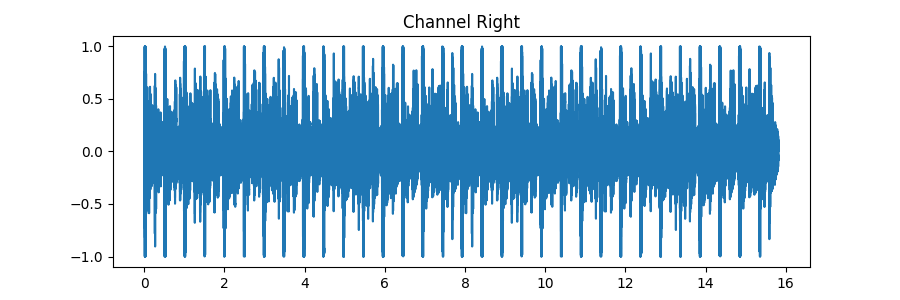

In [268]:
# LOAD THE AUDIO FILE :
x_elec0, Fs = sf.read('son/Electro.wav')

# SEPARATE RIGHT AND LEFT CHANNELS
x_elec0R = x_elec0[:, 0]

# VISUALIZE
plot_right(x_elec0R)

# LISTEN
sd.play(x_elec0, Fs)

### 3.2 Isolate the bass track and apply a saturation effect to it
#### ************************************************************************************************************************************************************************************
#### * The following tool allows you to synthesize a finite impulse response (FIR) or infinite impulse response (IIR) filter, of the low-pass, band-pass, or high-pass type.
#### * The sampling frequency ‘Fe’ must be equal to that of the signal to be filtered. 
#### * In the case of an IIF filter, the transfer function can be calculated as a fraction of different types of polynomials: Butterworth, Chebyshev I or II, elliptic, or Bessel.
#### * Once the parameters have been selected, click on ‘Calcul’ and the filter will be saved in the ‘FILTER1’ object. 


#### a. Select the parameters to synthesize a stable low-pass filter with a cutoff frequency of 500 Hz, attenuation greater than 5 dB above 250 Hz, and minimum order.

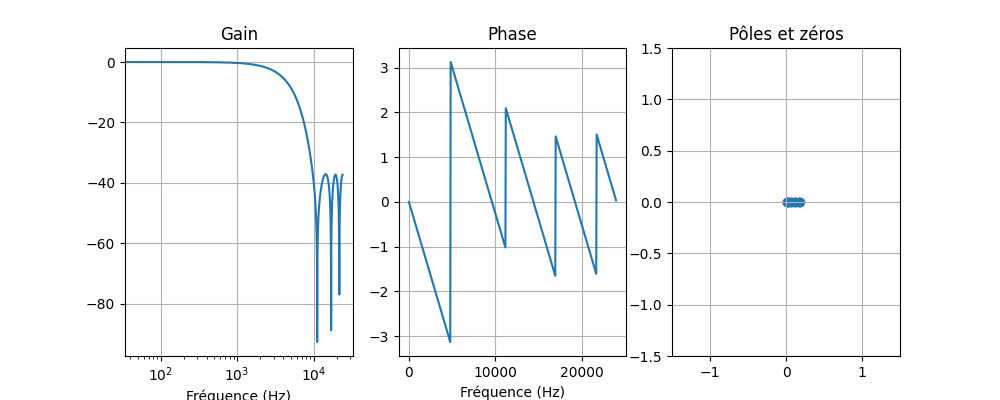

In [269]:
#FILTER SPECIFICATIONS : LOW-PASS fc=150Hz, IIR Order = 3
FILTRE1 = filtre()
fig, ax = plt.subplots(1,3,figsize=(10,4))
FILTRE1.display(ax, fig)

#### b. Filter the audio signal with the synthesized filter using the syntax : n, signal_filt = FILTRE1.filter(signal)

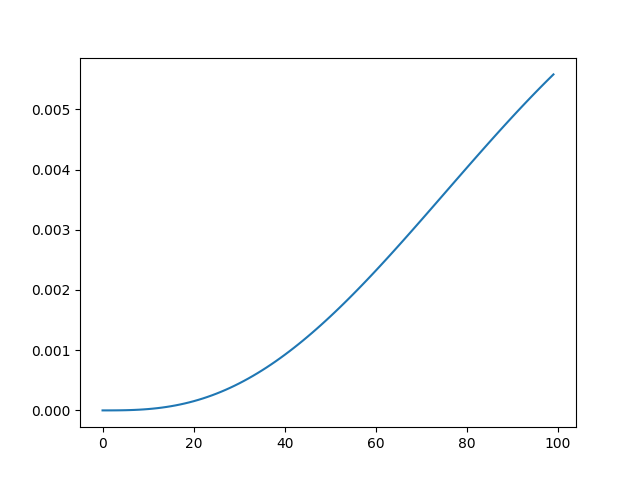

In [277]:
# VISUALIZE THE FILTER IMPULSE RESPONSE
n1, rep_imp1 = FILTRE1.impulse_response()
plt.figure()
plt.plot(n1,rep_imp1)

# FILTER
n_rif, x_filt0 = FILTRE1.filter(x_elec0R)
sd.play(x_filt0, Fs)

#### c. Listen to the audio signal obtained, comment on the result, then adjust the filter to isolate the bass track.

In [271]:
#LISTEN

#### d. Apply a saturation effect to the bass track and listen to the result.

In [281]:
# INITIALIZE
x_elecSatuR=np.zeros(np.shape(x_elec0R))

# STEP1 : NORMALIZE THE FILTERED WAVEFORM
x_filt0_norm=x_filt0*np.max(x_elec0R)/np.max(x_filt0)

# STEP2 : CHOOSE THE GAIN VALUE 
Gain = 0.05

# STEP3 : APPLY DISTORSION EFFECT (FOR LOOP) 

for n in range(1, len(x_filt0_norm)):
    x_elecSatuR[n]=x_filt0_norm[n]
    if x_filt0_norm[n]>Gain:
        x_elecSatuR[n] = min(x_filt0_norm[n],Gain)
    if x_filt0_norm[n]<-1*Gain:
        x_elecSatuR[n] = max(x_filt0_norm[n],-Gain)
 
# STEP4 : NORMALIZE THE DISTORTED WAVEFORM
x_elecSatuR_norm=x_elecSatuR*np.max(x_elec0R)/np.max(x_elecSatuR)

# STEP5 : LISTEN !
sd.play(x_elecSatuR_norm, Fs)


### 3.3 Isolate the vocal track and apply a saturation effect
#### a. Using the previous 'filter' tool, select the parameters to synthesize a filter that best isolates the vocals

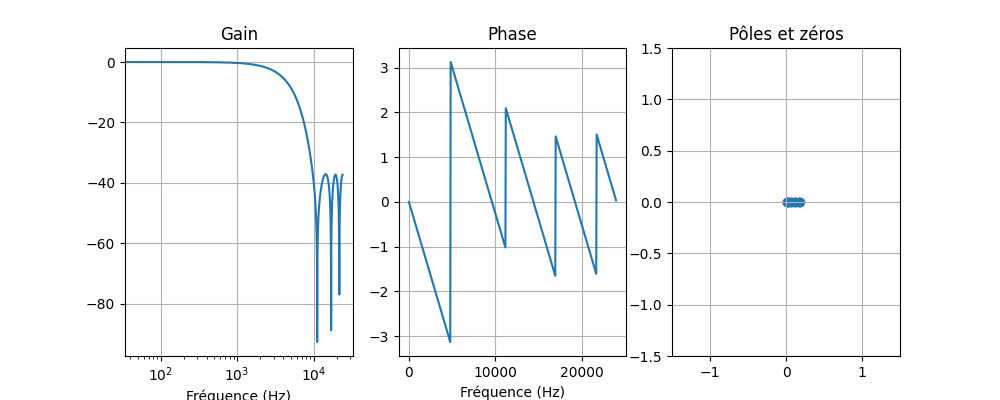

In [273]:
#FILTER SPECIFICATIONS : ??
FILTRE2 = filtre()
fig, ax = plt.subplots(1,3,figsize=(10,4))
FILTRE2.display(ax, fig)

#### b. Filter the audio signal with the synthesized filter using the syntax : n, signal_filt = FILTRE2.filter(signal)
#### (Listen to the audio signal obtained, comment on the result, then adjust the filter to isolate the vocal track.)

In [274]:
# FILTER
n_rif, x_filt1 = FILTRE2.filter(xR_vect)


# LISTEN !


NameError: name 'xR_vect' is not defined

#### c. Apply a reverb effect to the vocal track and listen to the result.

In [ ]:
# STEP1 : CHOOSE THE PARAMETERS VALUES N & K

# STEP2 : APPLY REVERB EFFECT (FOR LOOP) 

for kk in range(0,len()):
 
# STEP3 : NORMALIZE THE REVERBERATED WAVEFORM

# STEP4 : LISTEN !


### 3.4 MIX
#### a. Normalize the distorted bass and the reverberated voice tracks.

In [ ]:
# NORMALIZE THE DISTORTED BASS AND THE REVERB VOICE WAVEFORMS (if not done before!..) : x_n_vect =... /np.max(...)


#### b. Perform a weighted sum of the two tracks so as to favor either the bass track or the vocal track.

In [ ]:
# GainBASS=
# GainVOICE=

# Remix=GainBASS* .. + GainVOICE* .. # to be completed


#### c. View, listen to, and comment on the result, then adjust the mix gains to improve the musical rendering.